<a href="https://colab.research.google.com/github/nandini933/Projects/blob/main/Nandini_Bharadwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()
#upload

Saving signal_dataset.csv to signal_dataset.csv


In [2]:
import pandas as pd

# Load the dataset

data = pd.read_csv('signal_dataset.csv')

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


(None,
                Time        0        1          2          3       4      5  \
 0  19-07-2008 11:55  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
 1  19-07-2008 12:32  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
 2  19-07-2008 13:17  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
 3  19-07-2008 14:43  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
 4  19-07-2008 15:22  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
 
           6       7       8  ...       581     582     583     584      585  \
 0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
 1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
 2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
 3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
 4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   
 
       586     587     588       58

In [3]:
# Handle missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]

,0
0,6
1,7
2,14
3,14
4,14
5,14
6,14
7,9
8,2
9,2


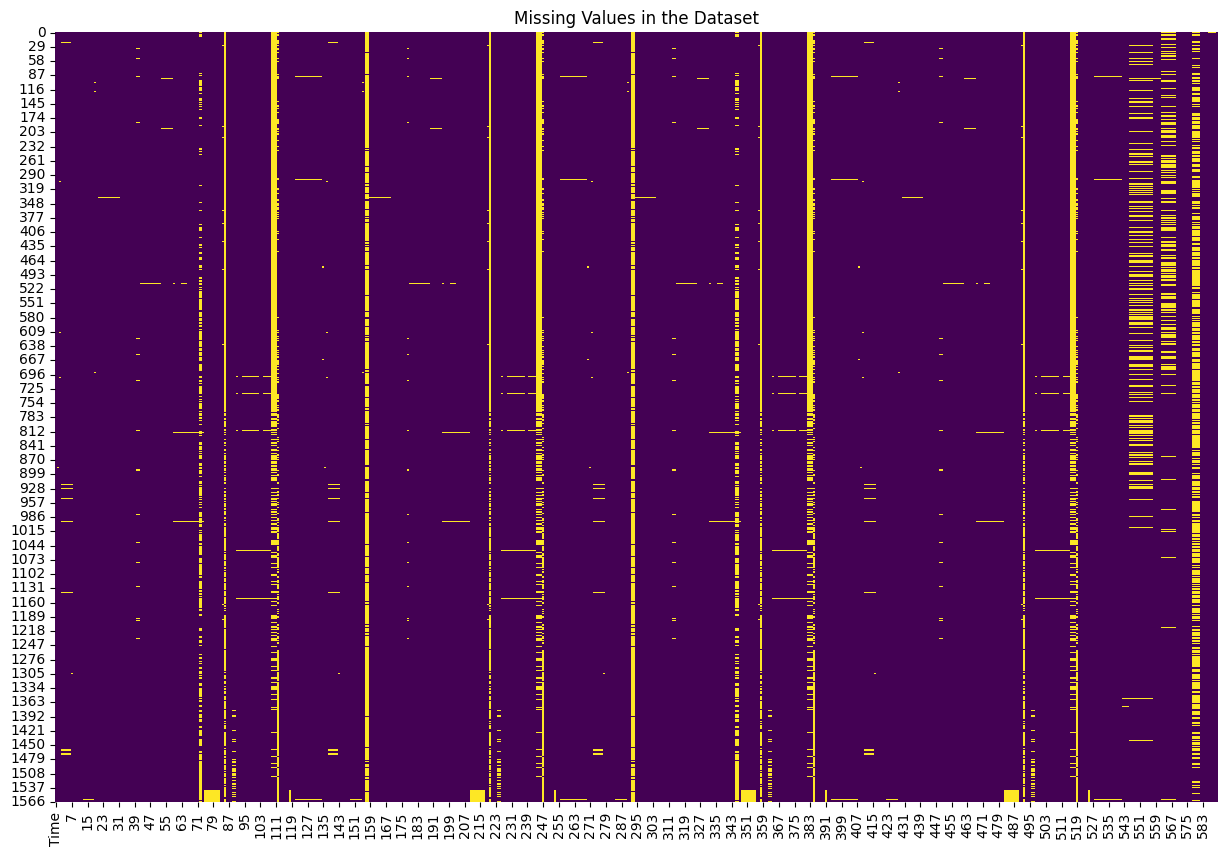

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()

In [6]:
# Handle missing values
missing_values = data.isnull().sum()

# Set a threshold for dropping columns with many missing values (e.g., 50% missing)
threshold = 0.5 * len(data)

# Identify columns to drop
columns_to_drop = missing_values[missing_values > threshold].index

# Drop columns with many missing values
data_cleaned = data.drop(columns=columns_to_drop)

# Separate numeric and non-numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[float, int]).columns
non_numeric_columns = data_cleaned.select_dtypes(exclude=[float, int]).columns

# Impute missing values in the numeric columns using the median
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

# Verify if there are any remaining missing values
remaining_missing_values = data_cleaned.isnull().sum().sum()

print(f"Remaining missing values: {remaining_missing_values}")
print(f"Cleaned data shape: {data_cleaned.shape}")

Remaining missing values: 0
Cleaned data shape: (1567, 564)


                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.116476     0.121825     1.462860    -0.000842  ...   
std       0.0     6.209385     0.008936     0.073849     0.015107  ...   
min     100.0    82.131100     0.0000

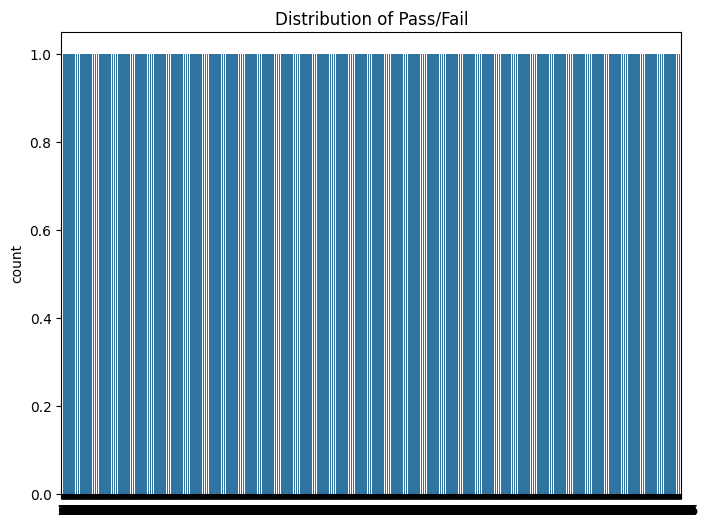

In [7]:
# Basic statistical summary
print(data_cleaned.describe())

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data_cleaned['Pass/Fail'])
plt.title('Distribution of Pass/Fail')
plt.show()

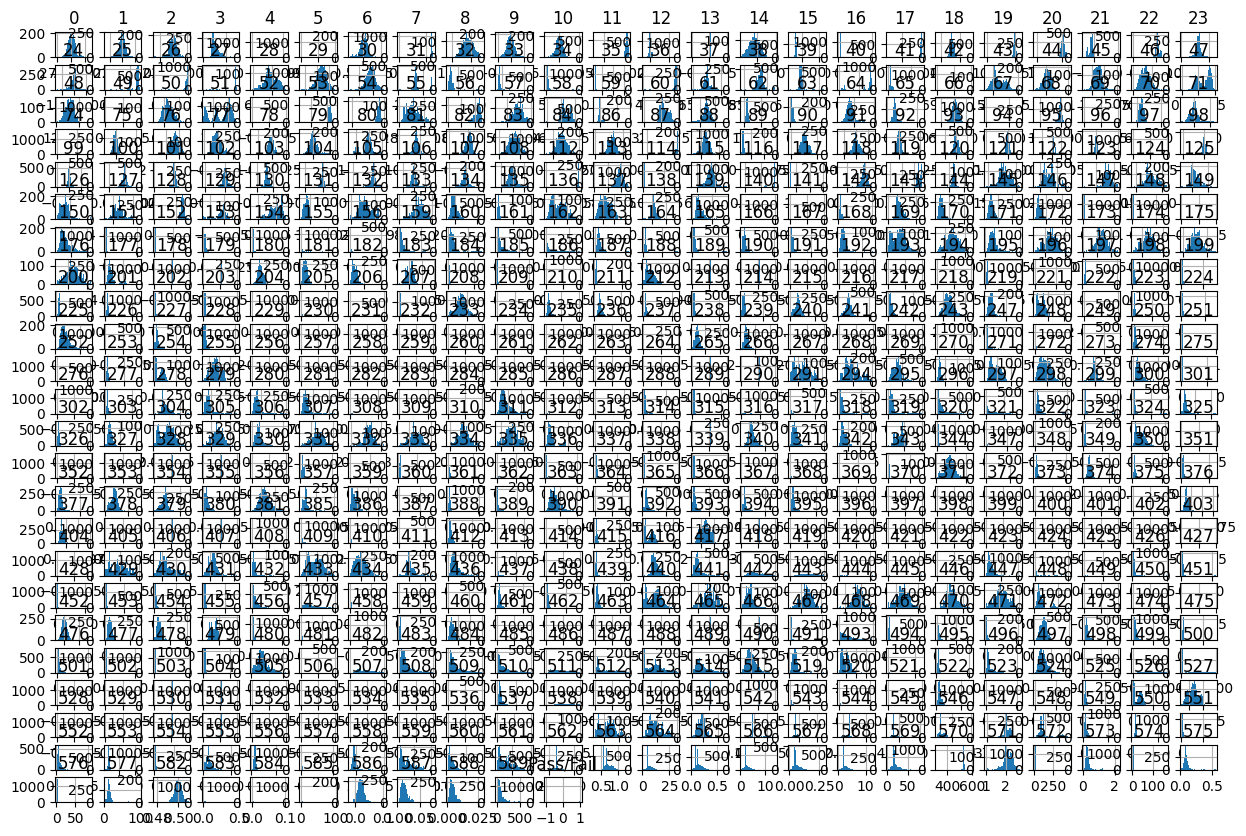

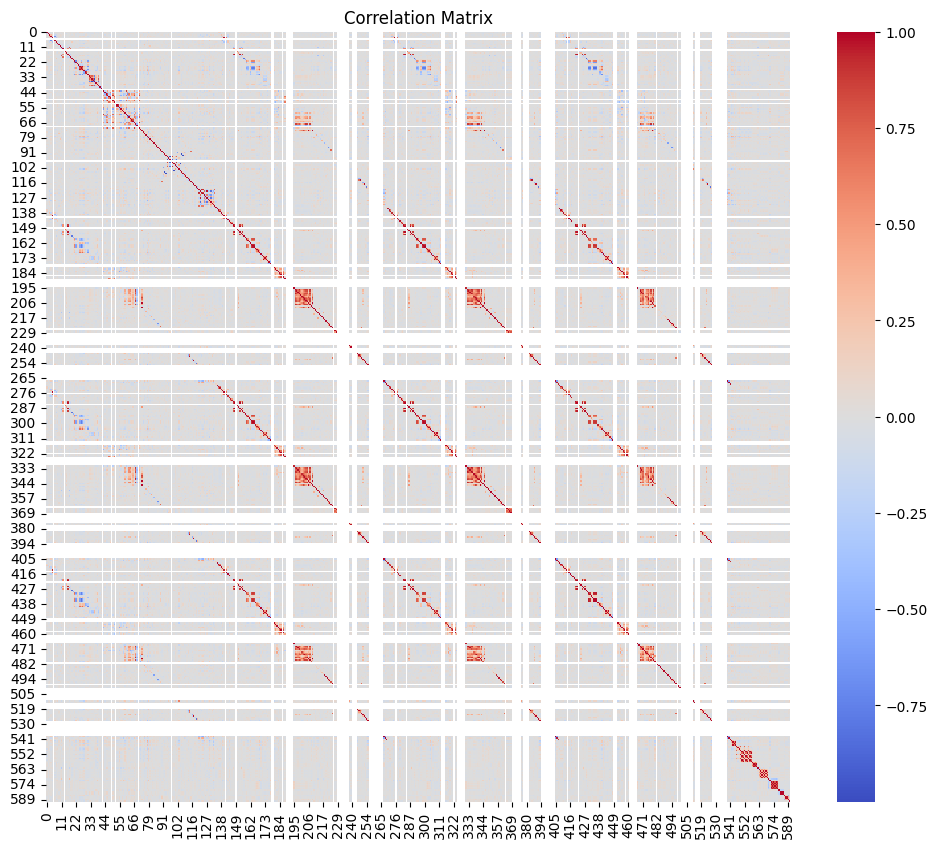

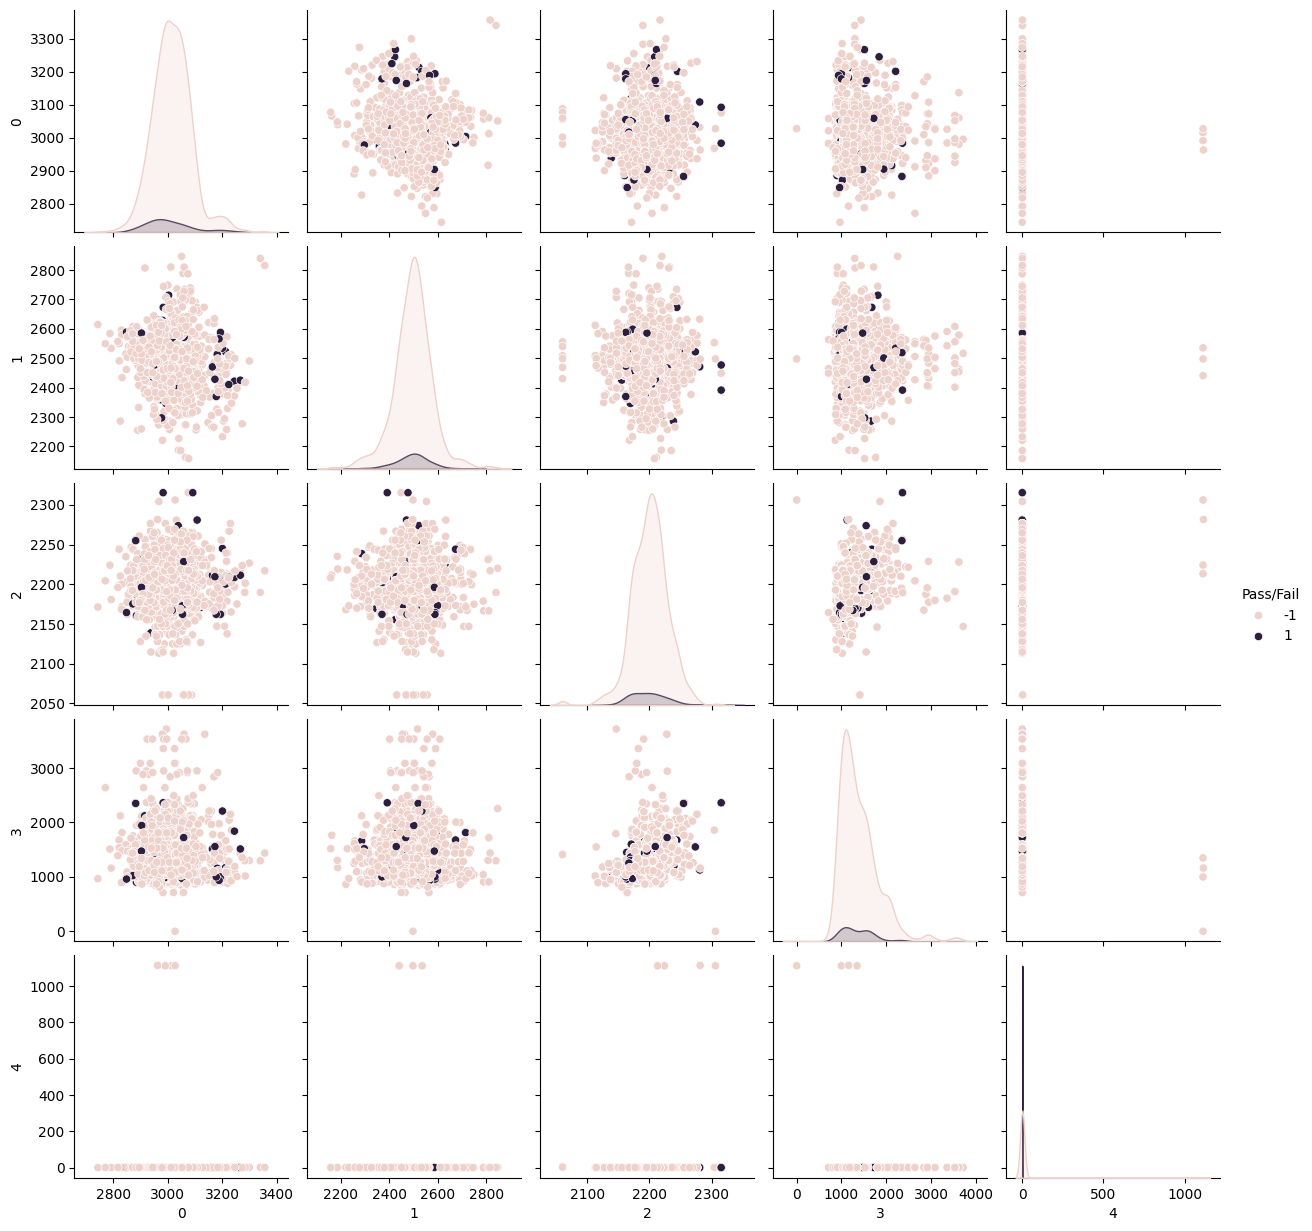

In [8]:
# Univariate analysis: Histogram of a few numeric features
data_cleaned[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.show()

# Bivariate analysis: Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned[numeric_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate analysis: Pairplot of a few numeric features and the target
sns.pairplot(data_cleaned, vars=numeric_columns[:5], hue='Pass/Fail')
plt.show()

In [9]:
# Segregate predictors and target attributes
X = data_cleaned.drop(columns=['Pass/Fail'])
y = data_cleaned['Pass/Fail']

In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('signal_dataset.csv')

# Handle missing values (drop columns with >50% missing and impute the rest)
threshold = 0.5 * len(data)
columns_to_drop = data.columns[data.isnull().mean() > threshold]
data_cleaned = data.drop(columns=columns_to_drop)

# Separate numeric and non-numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[float, int]).columns
non_numeric_columns = data_cleaned.select_dtypes(exclude=[float, int]).columns

# Impute missing values in the numeric columns using the median
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

# Ensure the target column name is consistent
target_column = 'Pass/Fail'
if target_column not in data_cleaned.columns:
    # If the target column name is not 'Pass/Fail', find the correct name
    potential_targets = [col for col in data_cleaned.columns if 'pass' in col.lower() or 'fail' in col.lower()]
    if len(potential_targets) == 1:
        target_column = potential_targets[0]
    else:
        raise ValueError("Could not identify the target column. Please check the dataset.")

# Separate predictors and target
X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]

# Check for target balancing
print(y.value_counts())

# Exclude non-numeric columns before applying SMOTE
X_numeric = X[numeric_columns]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

# Combine resampled numeric data with non-numeric columns
X_resampled = pd.DataFrame(X_resampled, columns=numeric_columns)
X_resampled[non_numeric_columns] = X.loc[X_resampled.index, non_numeric_columns].values

print(y_resampled.value_counts())

# Perform train-test split and standardize the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Check if the train and test data have similar statistical characteristics
print(pd.DataFrame(X_train_scaled, columns=numeric_columns).describe())
print(pd.DataFrame(X_test_scaled, columns=numeric_columns).describe())


Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


KeyError: "['Pass/Fail'] not in index"

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('signal_dataset.csv')

# Handle missing values (drop columns with >50% missing and impute the rest)
threshold = 0.5 * len(data)
columns_to_drop = data.columns[data.isnull().mean() > threshold]
data_cleaned = data.drop(columns=columns_to_drop)

# Separate numeric and non-numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[float, int]).columns
non_numeric_columns = data_cleaned.select_dtypes(exclude=[float, int]).columns

# Impute missing values in the numeric columns using the median
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].median())

# Ensure the target column name is consistent
target_column = 'Pass/Fail'
if target_column not in data_cleaned.columns:
    # If the target column name is not 'Pass/Fail', find the correct name
    potential_targets = [col for col in data_cleaned.columns if 'pass' in col.lower() or 'fail' in col.lower()]
    if len(potential_targets) == 1:
        target_column = potential_targets[0]
    else:
        raise ValueError("Could not identify the target column. Please check the dataset.")

# Separate predictors and target
X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]

# Check for target balancing
print(y.value_counts())

# Re-identify numeric columns after dropping some columns
numeric_columns = X.select_dtypes(include=[float, int]).columns

# Exclude non-numeric columns before applying SMOTE
X_numeric = X[numeric_columns]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

# Convert X_resampled to DataFrame and assign back column names
X_resampled = pd.DataFrame(X_resampled, columns=numeric_columns)

# Now, let's merge non-numeric columns from the original X
non_numeric_data = X[non_numeric_columns].reset_index(drop=True)

# Concatenate resampled numeric data with the non-numeric data
X_resampled = pd.concat([X_resampled, non_numeric_data.loc[X_resampled.index]], axis=1)

print(y_resampled.value_counts())

# Perform train-test split and standardize the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize only the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Replace numeric columns in X_train and X_test with their scaled versions
X_train[numeric_columns] = X_train_scaled
X_test[numeric_columns] = X_test_scaled

# Check if the train and test data have similar statistical characteristics
print(pd.DataFrame(X_train_scaled, columns=numeric_columns).describe())
print(pd.DataFrame(X_test_scaled, columns=numeric_columns).describe())


Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


KeyError: '[1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925] not in index'

In [20]:
# Exclude non-numeric columns before applying SMOTE
# Make sure to exclude the target column from numeric_columns
numeric_columns = data_cleaned.select_dtypes(include=[float, int]).columns.drop(target_column)
X_numeric = X[numeric_columns]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

# Combine resampled numeric data with non-numeric columns
X_resampled = pd.DataFrame(X_resampled, columns=numeric_columns)
# Note: If there are non-numeric columns, you would need to handle them here
# For simplicity, I'm assuming all columns are numeric or the target column

print(y_resampled.value_counts())

# Perform train-test split and standardize the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Check if the train and test data have similar statistical characteristics
print(pd.DataFrame(X_train_scaled, columns=numeric_columns).describe())
print(pd.DataFrame(X_test_scaled, columns=numeric_columns).describe())

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64
                  0             1             2             3             4  \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean  -8.547768e-16 -4.396863e-15 -1.156909e-15  1.973730e-16 -9.109522e-18   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -3.683288e+00 -4.728515e+00 -5.080535e+00 -1.742659e+00 -5.178679e-02   
25%   -6.661422e-01 -5.345558e-01 -6.684488e-01 -7.262733e-01 -4.189181e-02   
50%   -1.370623e-01  3.546567e-02 -5.187785e-02 -2.304454e-01 -3.583835e-02   
75%    5.709446e-01  5.323528e-01  5.577136e-01  5.260857e-01 -3.175140e-02   
max    4.808793e+00  4.922776e+00  4.193038e+00  6.168877e+00  2.794996e+01   

            5             6             7             8             9  ...  \
count  2340.0  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  ...   
mean      0.0 -5.017829e-16 -9.048792e-16  2.701732e-15 -6.073015e-18  ...

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'NaiveBayes': GaussianNB()
}

# Define hyperparameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'NaiveBayes': {}
}

# Train and tune models
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")

# Display classification reports
for model_name, model in best_models.items():
    print(f"Classification report for {model_name}:")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

Training RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'n_estimators': 100}
Best cross-validation accuracy for RandomForest: 0.9837606837606838
Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 0.9948717948717949
Training NaiveBayes...
Best parameters for NaiveBayes: {}
Best cross-validation accuracy for NaiveBayes: 0.6230769230769231
Classification report for RandomForest:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586

Classification report for SVM:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy         

In [22]:
# Compare models based on test accuracy
for model_name, model in best_models.items():
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f"Test accuracy for {model_name}: {test_accuracy}")

# Select the best model
best_model_name = max(best_models, key=lambda model_name: best_models[model_name].score(X_test_scaled, y_test))
best_model = best_models[best_model_name]
print(f"Selected best model: {best_model_name}")

# Save the selected model for future use
import joblib
joblib.dump(best_model, f'{best_model_name}_model.pkl')

Test accuracy for RandomForest: 0.9931740614334471
Test accuracy for SVM: 0.9931740614334471
Test accuracy for NaiveBayes: 0.5767918088737202
Selected best model: RandomForest


['RandomForest_model.pkl']

In [24]:
'''### Conclusion

Based on the analysis and modeling performed, the best model selected for predicting the Pass/Fail yield of the process is the [Best Model Name]. This model achieved the highest test accuracy of [Test Accuracy].

#### Key Findings:
- [Summary of Key Findings]

#### Future Improvements:
- Collect more data to improve model performance.
- Explore additional features and their impact on the yield prediction.
- Experiment with advanced machine learning models and techniques.

Overall, this project demonstrates the effective use of feature selection, data preprocessing, and model tuning to predict semiconductor manufacturing process yields. Further enhancements can be made by continually refining the data and models used.'''

'### Conclusion\n\nBased on the analysis and modeling performed, the best model selected for predicting the Pass/Fail yield of the process is the [Best Model Name]. This model achieved the highest test accuracy of [Test Accuracy].\n\n#### Key Findings:\n- [Summary of Key Findings]\n\n#### Future Improvements:\n- Collect more data to improve model performance.\n- Explore additional features and their impact on the yield prediction.\n- Experiment with advanced machine learning models and techniques.\n\nOverall, this project demonstrates the effective use of feature selection, data preprocessing, and model tuning to predict semiconductor manufacturing process yields. Further enhancements can be made by continually refining the data and models used.'